In [1]:
from goose import Goose
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob, Word
from sklearn.base import TransformerMixin
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
import datetime
%matplotlib inline

In [2]:
use_columns = ['url_raw', 'url_clean', 'url_domain', 'ugly_text', 'issue', 'political lean', 'title', 'meta_description', 'cleaned_text']
pld = pd.read_csv('0_18874.csv', usecols=use_columns)

In [3]:
pld.head(2)

,url_raw,url_clean,url_domain,ugly_text,issue,political lean,title,meta_description,cleaned_text
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left,‘A target on Roe v. Wade ’: Oklahoma bill maki...,Gov. Mary Fallin (R) has not said if she plans...,UPDATE: Gov. Fallin vetoed the bill on Friday....
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left,"Camille Paglia: Feminists have abortion wrong,...",Reproductive rights have become ideological to...,"While the Hillary flap was merely a blip, give..."


In [4]:
pld_text = pld[pld['cleaned_text'].notnull()]
pld_text['cleaned_text'].count()

14615

In [9]:
pld_text_5k = pld_text[0:5000]
pld_text_75k = pld_text[0:7500]
pld_text_10k = pld_text[0:10000]
pld_text_125k = pld_text[0:12500]
pld_text_146k = pld_text[0:14615]

In [10]:
print pld_text_5k['cleaned_text'].count()
print pld_text_75k['cleaned_text'].count()
print pld_text_10k['cleaned_text'].count()
print pld_text_125k['cleaned_text'].count()
print pld_text_146k['cleaned_text'].count()

5000
7500
10000
12500
14615


In [12]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text_5k['cleaned_text'], pld_text_5k['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.552143937046
0:02:41.939009


In [13]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text_75k['cleaned_text'], pld_text_75k['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.58417012875
0:04:14.005947


In [14]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text_10k['cleaned_text'], pld_text_10k['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.593696296769
0:06:47.933287


In [15]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text_125k['cleaned_text'], pld_text_125k['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.581900639885
0:09:48.193868


In [16]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer())
  ])),
  ('logreg', LogisticRegression())
])
print cross_val_score(pipe, pld_text_146k['cleaned_text'], pld_text_146k['political lean'], cv=5, scoring='accuracy').mean()
print datetime.datetime.now() - time

0.58110965185
0:09:35.717781


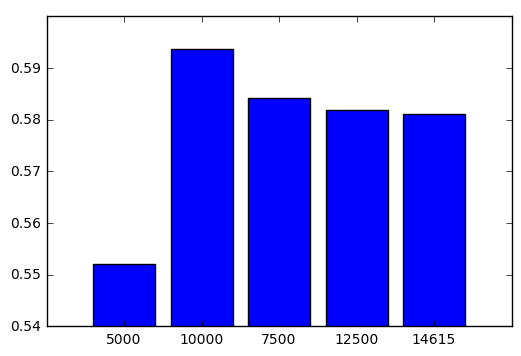

In [35]:
D = {5000: 0.552143937046, 7500: 0.58417012875, 10000: 0.593696296769, 12500: 0.581900639885, 14615: 0.58110965185}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.ylim([0.54,0.6])

plt.show()

In [5]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1,2)))
  ])),
  ('logreg', LogisticRegression())
])
cv = cross_val_score(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=10, scoring='accuracy')
print cv.mean()
print datetime.datetime.now() - time

0.619821419894
13:46:57.207543


In [15]:
cv

array([ 0.64412568,  0.68237705,  0.60177596,  0.60177596,  0.67168263,
        0.5687885 ,  0.61506849,  0.62097327,  0.57916381,  0.61248285])

In [8]:
time = datetime.datetime.now()
pipe = Pipeline([
  ('features', FeatureUnion([
        ('counts', CountVectorizer(ngram_range=(1,2)))
  ])),
  ('logreg', LogisticRegression())
])
predicted = cross_val_predict(pipe, pld_text['cleaned_text'], pld_text['political lean'], cv=5)

print datetime.datetime.now() - time

1:05:37.449672


In [24]:
predicted

array(['Left', 'Right', 'Left', ..., 'Center', 'Left', 'Left'], dtype=object)

In [25]:
predicted_df = pd.DataFrame(data=predicted, columns=['predicted_lean'])
predicted_df.head()

,predicted_lean
0,Left
1,Right
2,Left
3,Left
4,Center


In [63]:
predicted_df['actual_lean'] = ''

In [64]:
pld_text['political lean'].head(10)

0     Lean Left
1          Left
2     Lean Left
3          Left
4        Center
6         Mixed
8         Right
9         Right
11        Right
12        Right
Name: political lean, dtype: object

In [65]:
x = 0
for i, row in pld_text.iterrows():
    predicted_df.set_value(x,'actual_lean', row['political lean'])
    
    x = x + 1

In [66]:
predicted_df.head(15)

,predicted_lean,actual_lean
0,Left,Lean Left
1,Right,Left
2,Left,Lean Left
3,Left,Left
4,Center,Center
5,Mixed,Mixed
6,Right,Right
7,Right,Right
8,Right,Right
9,Right,Right


In [67]:
predicted_df.tail(10)

,predicted_lean,actual_lean
14605,Lean Left,Left
14606,Center,Center
14607,Lean Left,Lean Left
14608,Center,Right
14609,Center,Right
14610,Right,Right
14611,Left,Left
14612,Center,Lean Left
14613,Left,Lean Left
14614,Left,Left


In [85]:
predicted_df['match'] = ''

In [90]:
predicted_df['match'] = predicted_df['predicted_lean'] == predicted_df['actual_lean']

In [96]:
predicted_df.head()

,predicted_lean,actual_lean,match
0,Left,Lean Left,False
1,Right,Left,False
2,Left,Lean Left,False
3,Left,Left,True
4,Center,Center,True


In [101]:
predicted_df.to_csv('predicted_actual.csv', encoding='utf-8', index=False)

In [109]:
center = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Center'].predicted_lean.value_counts()
left = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Left'].predicted_lean.value_counts()
lean_left = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Lean Left'].predicted_lean.value_counts()
lean_right = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Lean Right'].predicted_lean.value_counts()
right = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Right'].predicted_lean.value_counts()
mixed = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Mixed'].predicted_lean.value_counts()
not_rated = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Not rated'].predicted_lean.value_counts()

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexe

In [127]:
print "LEFT: " + str(left.sum()) + " - " + str((434.0+419.0+5.0)/left.sum())
print left
print "-"
print "LEAN LEFT: " + str(lean_left.sum()) + " - " + str((405+13.0)/lean_left.sum())
print lean_left
print "-"
print "CENTER: " + str(center.sum()) + " - " + str((844.0+263.0)/center.sum())
print center
print "-"
print "LEAN RIGHT: " + str(lean_right.sum()) + " - " + str((41.0+21.0)/lean_right.sum())
print lean_right
print "-"
print "RIGHT: " + str(right.sum()) + " - " + str((934.0+211+193.0)/right.sum())
print right

LEFT: 1037 - 0.827386692382
Right         434
Center        419
Lean Left     172
Not rated       7
Lean Right      5
Name: predicted_lean, dtype: int64
-
LEAN LEFT: 1228 - 0.340390879479
Center        584
Right         405
Left          205
Not rated      21
Lean Right     13
Name: predicted_lean, dtype: int64
-
CENTER: 1531 - 0.723056825604
Right         844
Lean Left     381
Left          263
Not rated      24
Lean Right     19
Name: predicted_lean, dtype: int64
-
LEAN RIGHT: 220 - 0.281818181818
Center       80
Right        76
Lean Left    41
Left         21
Mixed         1
Not rated     1
Name: predicted_lean, dtype: int64
-
RIGHT: 1353 - 0.988913525499
Center        934
Left          211
Lean Left     193
Lean Right     11
Not rated       4
Name: predicted_lean, dtype: int64


In [128]:
metrics.accuracy_score(pld_text['political lean'], predicted)

0.62517960998973654

In [129]:
metrics.classification_report(pld_text['political lean'], predicted)

'             precision    recall  f1-score   support\n\n     Center       0.67      0.73      0.70      5699\n  Lean Left       0.67      0.57      0.61      2847\n Lean Right       0.35      0.11      0.16       246\n       Left       0.49      0.40      0.44      1715\n      Mixed       0.98      0.62      0.76        64\n  Not rated       0.21      0.15      0.17       100\n      Right       0.59      0.66      0.62      3944\n\navg / total       0.62      0.63      0.62     14615\n'

In [130]:
metrics.confusion_matrix(pld_text['political lean'], predicted)

array([[4168,  381,   19,  263,    0,   24,  844],
       [ 584, 1619,   13,  205,    0,   21,  405],
       [  80,   41,   26,   21,    1,    1,   76],
       [ 419,  172,    5,  678,    0,    7,  434],
       [  17,    1,    1,    1,   40,    0,    4],
       [  43,   18,    0,   10,    0,   15,   14],
       [ 934,  193,   11,  211,    0,    4, 2591]])

In [131]:
metrics.f1_score(pld_text['political lean'], predicted)

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.61855311826324622

In [ ]:
class GetText(TransformerMixin):

    def transform(self, X, **transform_params):
        domains = X.cleaned_text
        return domains

    def fit(self, X, y=None, **fit_params):
        return self

In [5]:
class Domain(TransformerMixin):

    def transform(self, X, **transform_params):
        domains = self.vect.transform(X)
        return domains

    def fit(self, X, y=None, **fit_params):
        self.vect = CountVectorizer(**fit_params)
        self.vect.fit(X)
        return self

In [6]:
class Url(TransformerMixin):

    def transform(self, X, **transform_params):
        domains = self.vect.transform(X)
        return domains

    def fit(self, X, y=None, **fit_params):
        self.vect = CountVectorizer(**fit_params)
        self.vect.fit(X)
        return self

In [145]:
time = datetime.datetime.now()

pipe = Pipeline([
  ('features', FeatureUnion([
    ('word', Pipeline([
      ('gettext', GetText()),
      ('counts', CountVectorizer(ngram_range=(1,2)))
    ])),
    ('domain', Domain()),
    ('url', Url())
  ])),
  ('logreg', LogisticRegression())
])

predicted = cross_val_predict(pipe, pld_text, pld_text['political lean'], cv=5, n_jobs=-1)
print datetime.datetime.now() - time

0:40:52.953497


In [146]:
predicted

array(['Lean Left', 'Right', 'Lean Left', ..., 'Lean Left', 'Lean Left',
       'Left'], dtype=object)

In [147]:
metrics.accuracy_score(pld_text['political lean'], predicted)

0.88573383510092374

In [148]:
metrics.classification_report(pld_text['political lean'], predicted)

'             precision    recall  f1-score   support\n\n     Center       0.89      0.92      0.91      5699\n  Lean Left       0.89      0.86      0.87      2847\n Lean Right       0.57      0.17      0.26       246\n       Left       0.91      0.87      0.89      1715\n      Mixed       1.00      0.83      0.91        64\n  Not rated       0.27      0.18      0.22       100\n      Right       0.88      0.92      0.90      3944\n\navg / total       0.88      0.89      0.88     14615\n'

In [149]:
metrics.f1_score(pld_text['political lean'], predicted)

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.88101030798741176

In [150]:
predicted_df = pd.DataFrame(data=predicted, columns=['predicted_lean'])
predicted_df.head()

,predicted_lean
0,Lean Left
1,Right
2,Lean Left
3,Left
4,Center


In [151]:
predicted_df['actual_lean'] = ''

In [152]:
x = 0
for i, row in pld_text.iterrows():
    predicted_df.set_value(x,'actual_lean', row['political lean'])
    x = x + 1

In [154]:
print len(predicted_df)
predicted_df.head()

14615


,predicted_lean,actual_lean
0,Lean Left,Lean Left
1,Right,Left
2,Lean Left,Lean Left
3,Left,Left
4,Center,Center


In [155]:
predicted_df['match'] = ''
predicted_df['match'] = predicted_df['predicted_lean'] == predicted_df['actual_lean']

In [156]:
predicted_df.head()

,predicted_lean,actual_lean,match
0,Lean Left,Lean Left,True
1,Right,Left,False
2,Lean Left,Lean Left,True
3,Left,Left,True
4,Center,Center,True


In [157]:
predicted_df.to_csv('predicted_actual_log_reg_best.csv', encoding='utf-8', index=False)

In [158]:
center = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Center'].predicted_lean.value_counts()
left = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Left'].predicted_lean.value_counts()
lean_left = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Lean Left'].predicted_lean.value_counts()
lean_right = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Lean Right'].predicted_lean.value_counts()
right = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Right'].predicted_lean.value_counts()
mixed = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Mixed'].predicted_lean.value_counts()
not_rated = predicted_df[predicted_df['match'] == False][predicted_df.actual_lean == 'Not rated'].predicted_lean.value_counts()

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexe

In [160]:
print "LEFT: " + str(left.sum())
print left
print "-"
print "LEAN LEFT: " + str(lean_left.sum())
print lean_left
print "-"
print "CENTER: " + str(center.sum())
print center
print "-"
print "LEAN RIGHT: " + str(lean_right.sum())
print lean_right
print "-"
print "RIGHT: " + str(right.sum())
print right

LEFT: 220
Right         88
Center        79
Lean Left     44
Lean Right     6
Not rated      3
Name: predicted_lean, dtype: int64
-
LEAN LEFT: 411
Center        208
Right         124
Left           58
Not rated      16
Lean Right      5
Name: predicted_lean, dtype: int64
-
CENTER: 441
Right         204
Lean Left     135
Left           63
Not rated      24
Lean Right     15
Name: predicted_lean, dtype: int64
-
LEAN RIGHT: 204
Center       72
Right        68
Lean Left    46
Left         14
Not rated     4
Name: predicted_lean, dtype: int64
-
RIGHT: 301
Center        219
Lean Left      58
Left           20
Lean Right      3
Not rated       1
Name: predicted_lean, dtype: int64


In [8]:
import scipy as sp

In [23]:
time = datetime.datetime.now()

vect = CountVectorizer(ngram_range=(1,2))
cv_text = vect.fit_transform(pld_text['cleaned_text'])
domain = Domain()
d_text = domain.fit_transform(pld_text['url_domain'])
url = Url()
url_text = url.fit_transform(pld_text['url_raw'])
all_other = sp.sparse.hstack((cv_text, d_text, url_text))

logreg = LogisticRegression()
logreg.fit_transform(all_other, pld_text['political lean'])

print datetime.datetime.now() - time

/Users/stanleystevensWhistle/miniconda2/envs/stanleyyork/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0:10:50.439075


In [24]:
political_folder = pd.read_csv('https://dataclips.heroku.com/heuwkhqdpstqyonvfywticdmeuir-political_bookmarks.csv')

In [34]:
political_folder.head(2)

,id,bookmark_id,description,private_source,progress,progress_timestamp,starred,time,title,url,...,month,clean_url,exis_inst_bk_id,week,wordcount,minutecount,minutecountfloat,bookmark_clean_url,linked_to_other_bookmark,bookmark_urls_present
0,63763,767728912,NaN,NaN,0.865710,1472692824,0,1472581902,The Polarization Of Red And Blue States From M...,http://fivethirtyeight.com/features/the-polari...,...,8,fivethirtyeight.com,NaN,35,483,NaN,1.932,fivethirtyeight.com/features/the-polarization-...,NaN,NaN
1,19874,512825586,Forget the Islamic State. The new conflicts of...,NaN,0.403916,1411283817,1,1411280802,Water Wars,http://www.foreignpolicy.com/articles/2014/09/...,...,9,foreignpolicy.com,NaN,37,1154,NaN,4.616,NaN,NaN,NaN


In [25]:
all_other.shape

(14615, 2088550)

In [26]:
cv_text2 = vect.transform(political_folder['bookmark_text'])
d_text2 = domain.transform(political_folder['clean_url'])
url_text2 = url.transform(political_folder['url'])
all_new = sp.sparse.hstack((cv_text2, d_text2, url_text2))
all_new.shape

(310, 2088550)

In [43]:
political_folder_preds = logreg.predict(all_new)

In [74]:
political_folder_proba = logreg.predict_proba(all_new)
highest = []
for p in political_folder_proba:
    highest.append(max(p))

In [97]:
pfproba_df = pd.DataFrame(data=political_folder_proba)
pfproba_df.columns = ['Center','Lean Left','Lean Right', 'Left','Mixed','Not rated','Right']
pfproba_df.head()

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right
0,0.171296,0.412137,8.124428e-04,0.015506,8.104771e-07,1.030930e-03,3.992163e-01
1,0.930709,0.044231,1.172719e-06,0.000077,3.342523e-17,3.483367e-07,2.498127e-02
2,0.697320,0.015958,5.358579e-03,0.020052,7.669492e-03,8.713954e-03,2.449276e-01
3,0.433247,0.045974,7.732949e-05,0.179575,2.583902e-11,5.276925e-02,2.883570e-01
4,0.993525,0.000009,1.083639e-23,0.006465,7.653039e-51,5.696782e-18,5.868536e-07


In [98]:
pfproba_df['highest'] = highest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15d426f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15ee9d290>]], dtype=object)

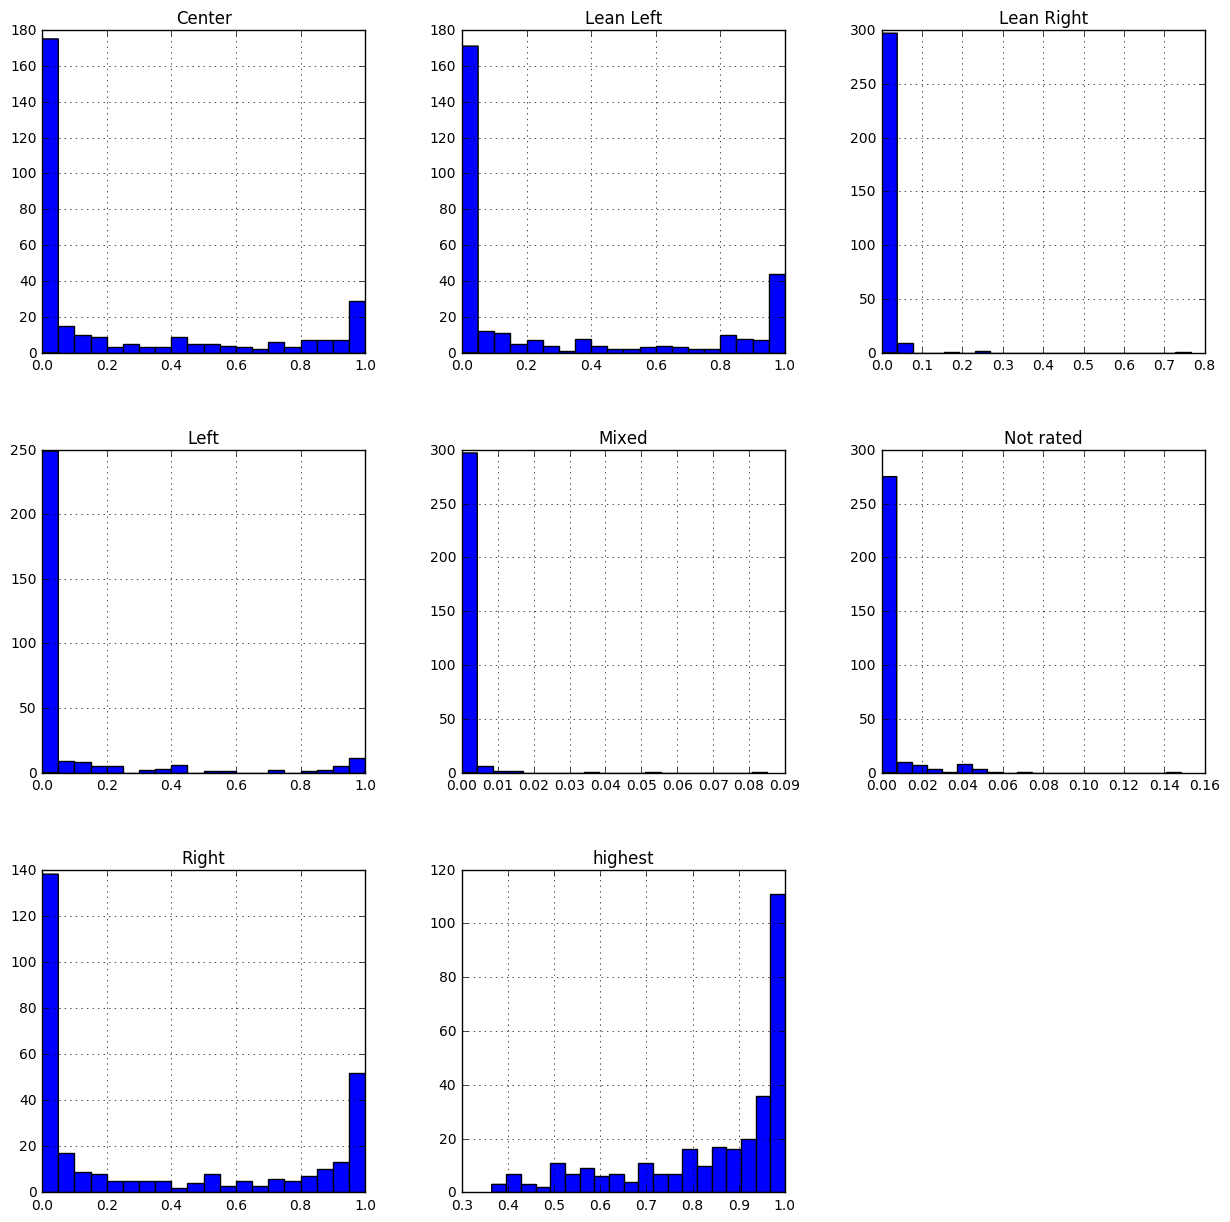

In [99]:
pfproba_df.hist(bins=20, figsize=(15,15))

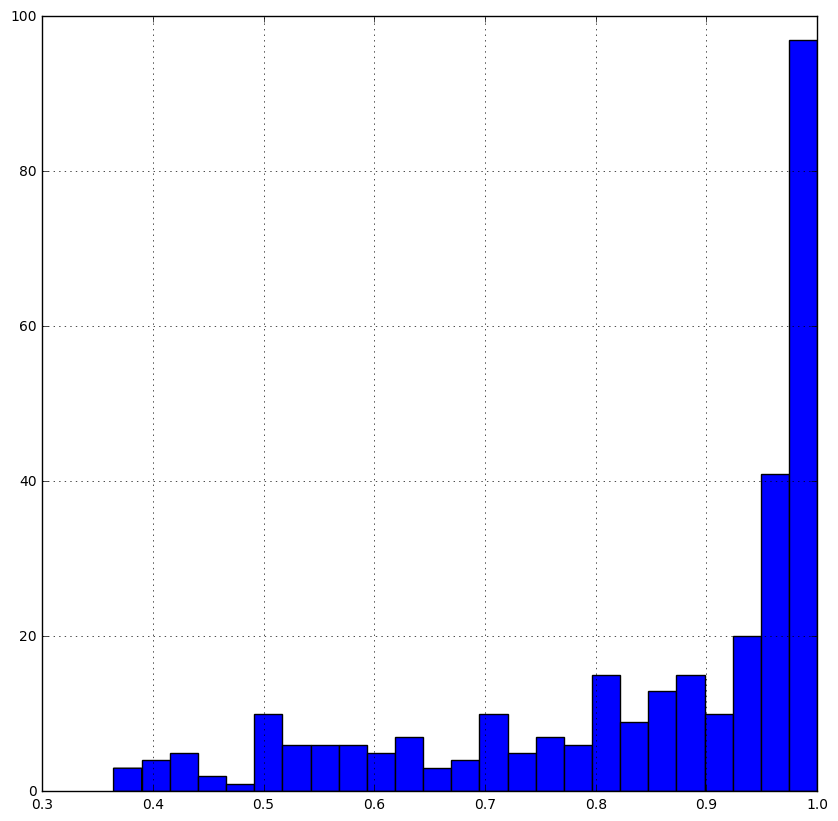

In [81]:
pfproba_df['highest'].hist(bins=25, figsize=(10,10))

In [85]:
print pfproba_df['highest'].count()
print pfproba_df[pfproba_df.highest > 0.8]['highest'].count()
print pfproba_df[pfproba_df.highest > 0.85]['highest'].count()
print pfproba_df[pfproba_df.highest > 0.9]['highest'].count()
print pfproba_df[pfproba_df.highest > 0.95]['highest'].count()

310
220
195
168
136


In [87]:
pfp_df['proba'] = pfproba_df['highest']
pfp_df.head(2)

,0,title,domain,url,proba
0,Lean Left,The Polarization Of Red And Blue States From M...,fivethirtyeight.com,http://fivethirtyeight.com/features/the-polari...,0.412137
1,Center,Water Wars,foreignpolicy.com,http://www.foreignpolicy.com/articles/2014/09/...,0.930709


In [38]:
pfp_df = pd.DataFrame(data=political_folder_preds)
pfp_df['title'] = political_folder['title']
pfp_df['domain'] = political_folder['clean_url']
pfp_df['url'] = political_folder['url']

In [96]:
threshold = 0.80
pfp_df[pfp_df.proba > threshold][0].value_counts()

Right        82
Lean Left    69
Center       50
Left         19
Name: 0, dtype: int64

In [93]:
threshold = 0.90
pfp_df[pfp_df.proba > threshold][0].value_counts()

Right        65
Lean Left    51
Center       36
Left         16
Name: 0, dtype: int64

In [91]:
threshold = 0.95
pfp_df[pfp_df.proba > threshold][0].value_counts()

Right        52
Lean Left    44
Center       29
Left         11
Name: 0, dtype: int64

In [95]:
threshold = 0.99
pfp_df[pfp_df.proba > threshold][0].value_counts()

Lean Left    28
Right        25
Center       16
Left          4
Name: 0, dtype: int64

In [32]:
pfp_df[0].value_counts()

Right         116
Lean Left      90
Center         79
Left           24
Lean Right      1
Name: 0, dtype: int64

In [27]:
predictions = logreg.predict_proba(all)

In [51]:
predictions_cat = logreg.predict(all)

In [93]:
metrics.accuracy_score(pld_text['political lean'], predictions_cat)

0.99952104002736919

In [50]:
print predictions_cat[0:39]
print predictions_cat[38]
print predictions_cat[1]

['Lean Left' 'Left' 'Lean Left' 'Left' 'Center' 'Mixed' 'Right' 'Right'
 'Right' 'Right' 'Left' 'Left' 'Left' 'Left' 'Center' 'Center' 'Center'
 'Center' 'Center' 'Lean Left' 'Lean Left' 'Left' 'Left' 'Center' 'Center'
 'Center' 'Center' 'Center' 'Right' 'Right' 'Right' 'Right' 'Left'
 'Lean Left' 'Left' 'Center' 'Center' 'Lean Left' 'Not rated']
Not rated
Left


In [63]:
predictions_cat

array(['Lean Left', 'Left', 'Lean Left', ..., 'Lean Left', 'Lean Left',
       'Left'], dtype=object)

In [73]:
pred_df = pd.DataFrame(data=predictions)
pred_df.columns = ['Center','Lean Left','Lean Right', 'Left','Mixed','Not rated','Right']
pred_df.head(10)

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right
0,0.000558,0.998342,3.380540e-08,0.000969,6.339383e-19,3.754635e-09,0.000132
1,0.000005,0.000003,5.617982e-06,0.998394,5.402596e-23,1.587966e-05,0.001576
2,0.000065,0.996237,3.753961e-04,0.003243,6.499032e-10,3.627969e-05,0.000043
3,0.000112,0.000922,3.344789e-05,0.997784,1.657359e-08,2.507093e-05,0.001124
4,0.996944,0.000116,2.794528e-04,0.000306,2.967385e-05,5.706959e-04,0.001754
5,0.009339,0.004602,7.831658e-03,0.006339,9.627315e-01,4.592833e-03,0.004564
6,0.000392,0.001899,6.462056e-07,0.000354,6.197432e-11,2.717731e-05,0.997328
7,0.000144,0.001093,4.245207e-07,0.000066,1.852503e-17,4.192347e-08,0.998697
8,0.000244,0.000128,2.854416e-05,0.001024,2.462897e-08,1.529171e-05,0.998561
9,0.000298,0.000003,3.543892e-09,0.000839,2.140025e-14,5.176419e-07,0.998859


In [74]:
pred_df['proba_pred_class'] = pred_df.idxmax(axis=1)

In [75]:
pred_df.head(7)

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right,proba_pred_class
0,0.000558,0.998342,3.380540e-08,0.000969,6.339383e-19,3.754635e-09,0.000132,Lean Left
1,0.000005,0.000003,5.617982e-06,0.998394,5.402596e-23,1.587966e-05,0.001576,Left
2,0.000065,0.996237,3.753961e-04,0.003243,6.499032e-10,3.627969e-05,0.000043,Lean Left
3,0.000112,0.000922,3.344789e-05,0.997784,1.657359e-08,2.507093e-05,0.001124,Left
4,0.996944,0.000116,2.794528e-04,0.000306,2.967385e-05,5.706959e-04,0.001754,Center
5,0.009339,0.004602,7.831658e-03,0.006339,9.627315e-01,4.592833e-03,0.004564,Mixed
6,0.000392,0.001899,6.462056e-07,0.000354,6.197432e-11,2.717731e-05,0.997328,Right


In [76]:
pred_df['pred_class'] = predictions_cat
# pd.DataFrame(data=predictions_cat)

In [77]:
pred_df.head()

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right,proba_pred_class,pred_class
0,0.000558,0.998342,3.380540e-08,0.000969,6.339383e-19,3.754635e-09,0.000132,Lean Left,Lean Left
1,0.000005,0.000003,5.617982e-06,0.998394,5.402596e-23,1.587966e-05,0.001576,Left,Left
2,0.000065,0.996237,3.753961e-04,0.003243,6.499032e-10,3.627969e-05,0.000043,Lean Left,Lean Left
3,0.000112,0.000922,3.344789e-05,0.997784,1.657359e-08,2.507093e-05,0.001124,Left,Left
4,0.996944,0.000116,2.794528e-04,0.000306,2.967385e-05,5.706959e-04,0.001754,Center,Center


In [78]:
pred_df['match'] = pred_df['proba_pred_class'] == pred_df['pred_class']

In [79]:
pred_df.head()

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right,proba_pred_class,pred_class,match
0,0.000558,0.998342,3.380540e-08,0.000969,6.339383e-19,3.754635e-09,0.000132,Lean Left,Lean Left,True
1,0.000005,0.000003,5.617982e-06,0.998394,5.402596e-23,1.587966e-05,0.001576,Left,Left,True
2,0.000065,0.996237,3.753961e-04,0.003243,6.499032e-10,3.627969e-05,0.000043,Lean Left,Lean Left,True
3,0.000112,0.000922,3.344789e-05,0.997784,1.657359e-08,2.507093e-05,0.001124,Left,Left,True
4,0.996944,0.000116,2.794528e-04,0.000306,2.967385e-05,5.706959e-04,0.001754,Center,Center,True


In [81]:
print pred_df['match'].sum()
pred_df[pred_df.match == False]

14615


,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right,proba_pred_class,pred_class,match


In [83]:
pred_df['actual'] = pld_text['political lean']

In [84]:
pred_df.head()

,Center,Lean Left,Lean Right,Left,Mixed,Not rated,Right,proba_pred_class,pred_class,match,actual
0,0.000558,0.998342,3.380540e-08,0.000969,6.339383e-19,3.754635e-09,0.000132,Lean Left,Lean Left,True,Lean Left
1,0.000005,0.000003,5.617982e-06,0.998394,5.402596e-23,1.587966e-05,0.001576,Left,Left,True,Left
2,0.000065,0.996237,3.753961e-04,0.003243,6.499032e-10,3.627969e-05,0.000043,Lean Left,Lean Left,True,Lean Left
3,0.000112,0.000922,3.344789e-05,0.997784,1.657359e-08,2.507093e-05,0.001124,Left,Left,True,Left
4,0.996944,0.000116,2.794528e-04,0.000306,2.967385e-05,5.706959e-04,0.001754,Center,Center,True,Center


In [86]:
pred_df['match_actual'] = ''
pred_df['match_actual'] = pred_df['actual'] == pred_df['pred_class']

In [88]:
pred_df['match'].sum()

14615